# Importing Libraries

In [3]:
# Library for handling data
import pandas as pd
# Library for performing mathematical and statistical calculations
import numpy as np
# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Model Performance
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error

# Warnings suppressed
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
from google.colab import files

# Importing dataset

In [4]:
uploaded = files.upload()
uploaded = files.upload()
dt_trn = pd.read_csv('Training Data Set.csv')
dt_test = pd.read_csv('Testing Data Set.csv')
dt_trn

Saving Training Data Set.csv to Training Data Set (1).csv


Saving Testing Data Set.csv to Testing Data Set (1).csv


,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
1,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
2,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
3,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
4,10.0,33850,NaN,tcp,0,Unix Operating System Unsupported Version Dete...,The operating system running on the remote hos...,"According to its self-reported version number,...",Upgrade to a version of the Unix operating sys...,NaN
...,...,...,...,...,...,...,...,...,...,...
23913,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23914,1.9,122591,CVE-2018-10545,tcp,443,PHP 5.6.x < 5.6.35 Security Bypass Vulnerability,The version of PHP running on the remote web s...,"According to its banner, the version of PHP ru...",Upgrade to PHP version 5.6.35 or later.,http://php.net/ChangeLog-5.php#5.6.35
23915,1.9,128115,CVE-2019-1552,tcp,80,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23916,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....


In [5]:
dt_test.shape

(2597, 9)

In [6]:
dt_trn = dt_trn.dropna()
dt_test = dt_test.dropna()

In [7]:
dt_test.shape

(1968, 9)

In [8]:
dt_trn


,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
21,10.0,125313,CVE-2019-0708,tcp,3389,Microsoft RDP RCE (CVE-2019-0708) (BlueKeep) (...,The remote host is affected by a remote code e...,The remote host is affected by a remote code e...,Microsoft has released a set of patches for Wi...,http://www.nessus.org/u?577af692\nhttp://www.n...
28,10.0,58811,CVE-2009-0037,tcp,2381,HP System Management Homepage < 7.0 Multiple V...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage 7.0 o...,http://www.nessus.org/u?106ec533
29,10.0,58811,CVE-2010-0734,tcp,2381,HP System Management Homepage < 7.0 Multiple V...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage 7.0 o...,http://www.nessus.org/u?106ec533
30,10.0,58811,CVE-2010-1452,tcp,2381,HP System Management Homepage < 7.0 Multiple V...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage 7.0 o...,http://www.nessus.org/u?106ec533
31,10.0,58811,CVE-2010-1623,tcp,2381,HP System Management Homepage < 7.0 Multiple V...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage 7.0 o...,http://www.nessus.org/u?106ec533
...,...,...,...,...,...,...,...,...,...,...
23913,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23914,1.9,122591,CVE-2018-10545,tcp,443,PHP 5.6.x < 5.6.35 Security Bypass Vulnerability,The version of PHP running on the remote web s...,"According to its banner, the version of PHP ru...",Upgrade to PHP version 5.6.35 or later.,http://php.net/ChangeLog-5.php#5.6.35
23915,1.9,128115,CVE-2019-1552,tcp,80,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....
23916,1.9,128115,CVE-2019-1552,tcp,443,OpenSSL 1.0.2 < 1.0.2t Vulnerability,The remote service is affected by a vulnerabil...,The version of tested product installed on the...,Upgrade to OpenSSL version 1.0.2t or later.,http://www.nessus.org/u?27ebc9b1\nhttps://www....


In [9]:
dt_test

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution,See Also
0,90150,CVE-2015-1791,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
1,90150,CVE-2015-1792,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
2,90150,CVE-2015-1793,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
3,90150,CVE-2015-3143,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
4,90150,CVE-2015-3145,tcp,2381,HP System Management Homepage < 7.5.4 Multiple...,The remote web server is affected by multiple ...,"According to the web server's banner, the vers...",Upgrade to HP System Management Homepage (SMH)...,http://www.nessus.org/u?d91095a9\nhttps://weak...
...,...,...,...,...,...,...,...,...,...
2592,65821,CVE-2015-2808,tcp,3389,SSL RC4 Cipher Suites Supported (Bar Mitzvah),The remote service supports the use of the RC4...,The remote host supports the use of RC4 in one...,"Reconfigure the affected application, if possi...",http://www.nessus.org/u?ac7327a0\nhttp://cr.yp...
2593,83738,CVE-2015-4000,tcp,5666,SSL/TLS EXPORT_DHE <= 512-bit Export Cipher Su...,The remote host supports a set of weak ciphers.,The remote host supports EXPORT_DHE cipher sui...,Reconfigure the service to remove support for ...,https://weakdh.org/
2594,83875,CVE-2015-4000,tcp,443,SSL/TLS Diffie-Hellman Modulus <= 1024 Bits (L...,The remote host allows SSL/TLS connections wit...,The remote host allows SSL/TLS connections wit...,Reconfigure the service to use a unique Diffie...,https://weakdh.org/
2595,31705,CVE-2007-1858,tcp,5666,SSL Anonymous Cipher Suites Supported,The remote service supports the use of anonymo...,The remote host supports the use of anonymous ...,Reconfigure the affected application if possib...,http://www.nessus.org/u?3a040ada


# Data preprocessing

In [10]:
dt_trn[["CVE"]] = dt_trn[["CVE"]].apply(lambda col:pd.Categorical(col).codes)
dt_test[["CVE"]] = dt_test[["CVE"]].apply(lambda col:pd.Categorical(col).codes)

In [11]:
dt_trn[['Protocol']]=dt_trn[['Protocol']].apply(lambda col:pd.Categorical(col).codes)
dt_test[['Protocol']] = dt_test[['Protocol']].apply(lambda col:pd.Categorical(col).codes)

In [12]:

dt_trn[['Name']]=dt_trn[['Name']].apply(lambda col:pd.Categorical(col).codes)
dt_test[['Name']]=dt_test[['Name']].apply(lambda col:pd.Categorical(col).codes)

In [13]:
dt_trn[['Synopsis']]=dt_trn[['Synopsis']].apply(lambda col:pd.Categorical(col).codes)
dt_test[['Synopsis']]=dt_test[['Synopsis']].apply(lambda col:pd.Categorical(col).codes)


In [14]:
dt_trn[['Description']]=dt_trn[['Description']].apply(lambda col:pd.Categorical(col).codes)
dt_test[['Description']]=dt_test[['Description']].apply(lambda col:pd.Categorical(col).codes)

In [15]:
dt_trn[['Solution']]=dt_trn[['Solution']].apply(lambda col:pd.Categorical(col).codes)
dt_test[['Solution']]=dt_test[['Solution']].apply(lambda col:pd.Categorical(col).codes)


In [16]:
dt_trn = dt_trn.drop("See Also", axis = 1)
dt_test = dt_test.drop("See Also",axis =1)

In [59]:
dt_trn

,CVSS,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution
21,10.0,125313,777,0,3389,62,54,227,32
28,10.0,58811,148,0,2381,33,87,188,80
29,10.0,58811,188,0,2381,33,87,188,80
30,10.0,58811,192,0,2381,33,87,188,80
31,10.0,58811,194,0,2381,33,87,188,80
...,...,...,...,...,...,...,...,...,...
23913,1.9,128115,787,0,443,89,71,261,129
23914,1.9,122591,735,0,443,190,112,159,220
23915,1.9,128115,787,0,80,89,71,261,129
23916,1.9,128115,787,0,443,89,71,261,129


In [18]:
dt_test

,Plugin ID,CVE,Protocol,Port,Name,Synopsis,Description,Solution
0,90150,183,0,2381,14,23,37,25
1,90150,184,0,2381,14,23,37,25
2,90150,185,0,2381,14,23,37,25
3,90150,191,0,2381,14,23,37,25
4,90150,192,0,2381,14,23,37,25
...,...,...,...,...,...,...,...,...
2592,65821,190,0,3389,49,19,46,10
2593,83738,199,0,5666,51,13,45,11
2594,83875,199,0,443,50,12,43,12
2595,31705,42,0,5666,46,17,48,9


In [19]:
dt_trn.isna().sum()

CVSS           0
Plugin ID      0
CVE            0
Protocol       0
Port           0
Name           0
Synopsis       0
Description    0
Solution       0
dtype: int64

In [20]:
dt_test.isna().sum()

Plugin ID      0
CVE            0
Protocol       0
Port           0
Name           0
Synopsis       0
Description    0
Solution       0
dtype: int64

# Data visualization

## 2D Line Graph

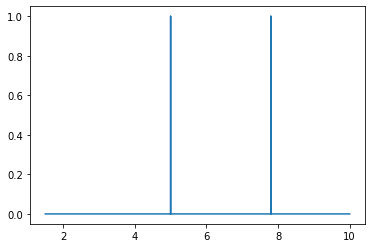

In [21]:

fig, ax = plt.subplots()
ax.plot(dt_trn['CVSS'], dt_trn['Protocol'])

## Violin Plot

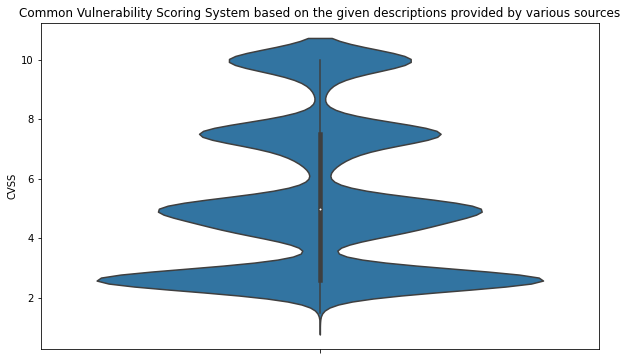

In [22]:
plt.figure(figsize=(10,6))
plt.title("Common Vulnerability Scoring System based on the given descriptions provided by various sources")
sns.axes_style("dark")
sns.violinplot(y=dt_trn["CVSS"])
plt.show()

In [23]:
fig_hist = px.histogram(dt_trn, x="CVSS", color="Solution")
fig_hist.show()

In [24]:
fig_scatter = px.scatter(dt_trn, x="CVSS", y="Solution", marginal_x="histogram", marginal_y="rug")
fig_scatter.show()

In [25]:
fig_scatline = px.scatter(dt_trn, x="CVSS", y="CVE", trendline="ols")
fig_scatline.show()

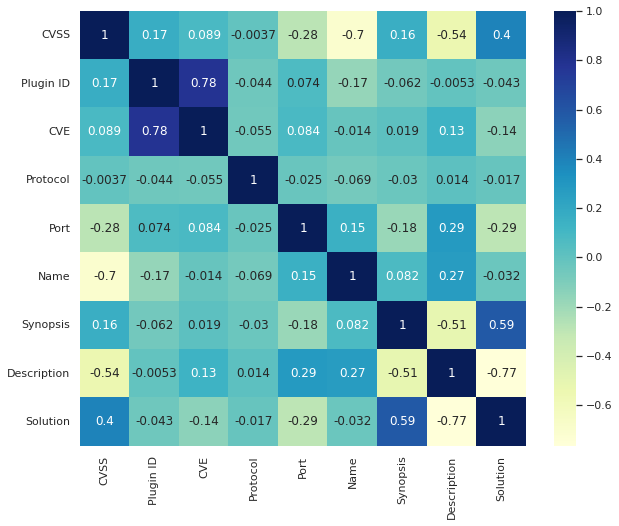

In [26]:
sns.set(rc={'figure.figsize':(10,8)})
dplt = sns.heatmap(dt_trn.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Handling data

In [27]:
from sklearn.tree import DecisionTreeClassifier
X=dt_trn.drop("CVSS", axis=1)

In [28]:
Y=dt_trn["CVSS"]


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_hat, y_train, y_hat = train_test_split(X, Y, test_size=0.2, random_state=1)

# random forest regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

# creating the regressor object

In [31]:

randomregressor = RandomForestRegressor()

In [32]:
randomregressor.fit(x_train, y_train) 

RandomForestRegressor()

In [33]:
Y_pred = randomregressor.predict(dt_test)  

In [34]:
Y_pred

array([6.419, 6.419, 6.455, ..., 6.729, 7.637, 7.074])

In [35]:
len(Y_pred)

1968

In [36]:
with open('Random Forest.csv', 'w') as f:
    for line in Y_pred:
        f.write(str(line))
        f.write('\n')

# accuracy score

In [37]:
print('score: {}'.format(randomregressor.score(x_hat, y_hat)))

score: 0.994098843369398


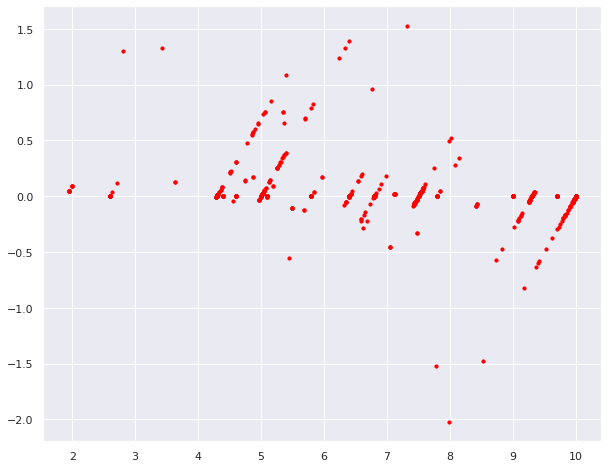

In [38]:
plt.scatter(randomregressor.predict(x_train), randomregressor.predict(x_train) - y_train, color = "red", s = 10, label = 'Train data')

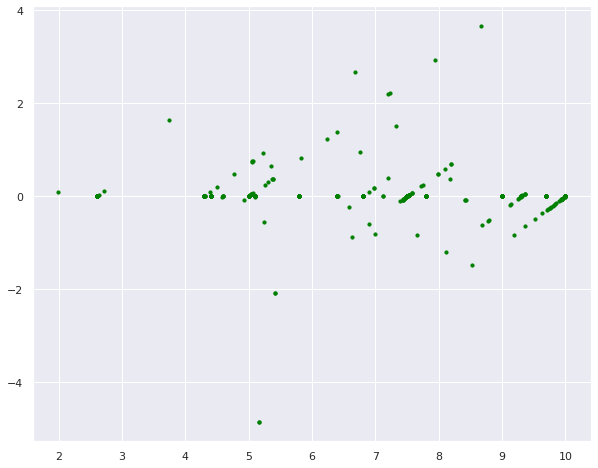

In [39]:
plt.scatter(randomregressor.predict(x_hat), randomregressor.predict(x_hat) - y_hat,color = "green", s = 10, label = 'Test data')

# ridge regression

In [40]:

from sklearn.linear_model import Ridge

In [41]:
clf = Ridge(alpha=1.0)

# model fitting

In [42]:
clf.fit(x_train, y_train)

Ridge()

# prediction

In [43]:
y_pred=clf.predict(dt_test)

In [44]:
y_pred

array([9.21337486, 9.21640535, 9.21943585, ..., 8.5611381 , 8.44981597,
       8.26792393])

In [45]:
with open('Ridge Regressor.csv', 'w') as f:
    for line in y_pred:
        f.write(str(line))
        f.write('\n')

# accuracy score

In [46]:
clf.score(x_hat,y_hat)

0.6835473333403066

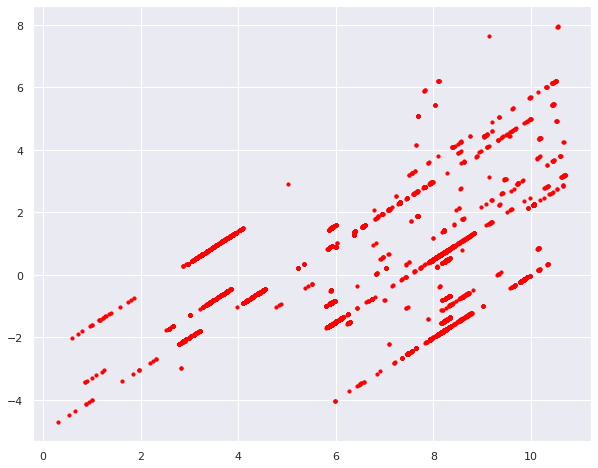

In [47]:
plt.scatter(clf.predict(x_train), clf.predict(x_train) - y_train, color = "red", s = 10, label = 'Train data')

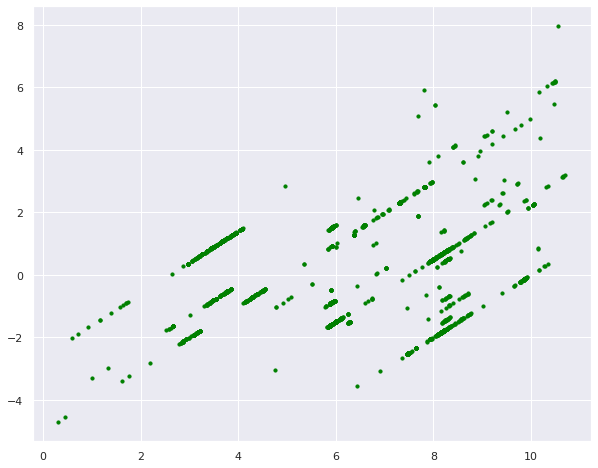

In [48]:
plt.scatter(clf.predict(x_hat), clf.predict(x_hat) - y_hat,color = "green", s = 10, label = 'Test data')

# lasso regression

In [49]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso(alpha = 1)

In [51]:
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [52]:
y_pred1 = lasso.predict(dt_test)

In [53]:
y_pred1

array([9.11013586, 9.11292198, 9.1157081 , ..., 8.4292064 , 8.27219016,
       8.13752086])

In [54]:
len(y_pred1)

1968

In [55]:
with open('lasso Regression.csv', 'w') as f:
    for line in y_pred1:
        f.write(str(line))
        f.write('\n')

# accuracy score

In [56]:
lasso.score(x_hat,y_hat)

0.6823042926712521

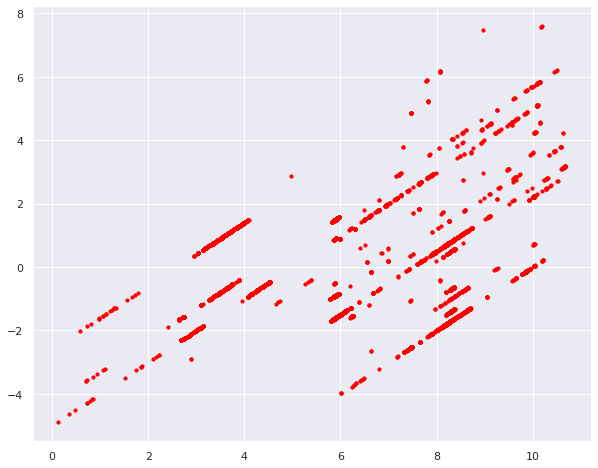

In [57]:
plt.scatter(lasso.predict(x_train), lasso.predict(x_train) - y_train, color = "red", s = 10, label = 'Train data')

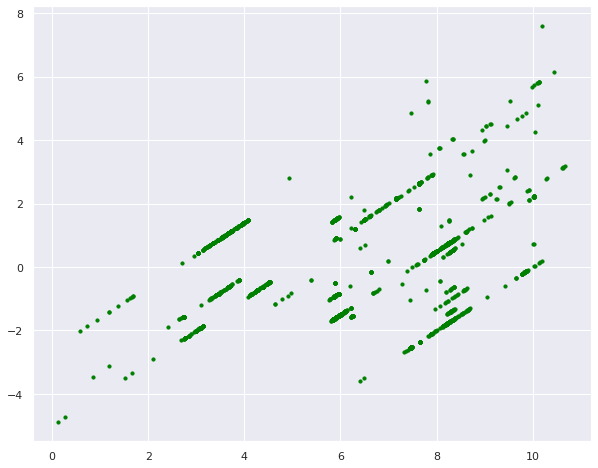

In [58]:
plt.scatter(lasso.predict(x_hat), lasso.predict(x_hat) - y_hat,color = "green", s = 10, label = 'Test data')